## Database

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#from autosklearn.classification import AutoSklearnClassifier

%matplotlib inline

Databases de cada Local para facilitar a limpeza e padronização dos dataframes

In [6]:
#Lendo a base de dados
#df1=pd.read_csv('Focos_2018-12-31_2019-12-31.csv', low_memory=False)
#df2=pd.read_csv('Focos_2020-01-01_2020-10-04.csv', low_memory=False)
df=pd.read_csv("Focos_2020-01-01_2020-09-11.csv", low_memory=False)

In [7]:
#frames=[df1,df2]
#df = pd.concat(frames)

In [8]:
#demonstrando dados iniciais
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2020/06/17 17:35:00,AQUA_M-T,Argentina,Chaco,San Fernando,NaN,12.0,1.0,1.0,-27.789,-58.862,15.5
1,2020/06/17 17:35:00,AQUA_M-T,Argentina,Corrientes,Empedrado,NaN,3.0,0.9,1.0,-27.819,-58.526,10.9
2,2020/06/17 17:35:00,AQUA_M-T,Argentina,Chaco,San Fernando,NaN,13.0,0.6,1.0,-27.820,-59.206,101.6
3,2020/06/17 17:35:00,AQUA_M-T,Argentina,Santiago del Estero,Moreno,NaN,5.0,0.0,1.0,-27.640,-62.138,50.6
4,2020/06/17 17:35:00,AQUA_M-T,Argentina,Chaco,San Fernando,NaN,13.0,0.6,1.0,-27.556,-59.201,15.9


In [9]:
#Retirando variáveis desnecessárias e separando a data e a hora
df[['data','hora']] = df.datahora.str.split(" ",expand=True,)

df_novo=df.drop(["datahora","satelite","bioma","municipio","estado","frp"], axis=1)

df_novo.data = df_novo.data.str.replace("/", " ")
df_novo[['ano','mes',"dia"]] = df_novo.data.str.split(" ",expand=True,)

df_novo['hora'] = df_novo['hora'].str.replace(r'\D', '')
df_novo['hora'] = df_novo['hora'].astype(int)
df_novo['mes'] = df_novo['mes'].astype(int)
df_novo['dia'] = df_novo['dia'].astype(float)

df_novo.loc[(60000< df_novo.hora) | (df_novo.hora<180000), "horario"]=0
df_novo.loc[(df_novo.hora>180000) | (df_novo.hora<60000), "horario"]=1


df_novo=df_novo.drop(["data","ano","hora"], axis=1)



df.novo=df_novo.dropna(how='any', inplace=True)
indexNames = df_novo[ (df_novo['diasemchuva'] < 0) | (df_novo['riscofogo'] < 0) ].index
df_novo.drop(indexNames , inplace=True)

#df_novo=df_novo.replace(-999, 0)

In [10]:
df_novo.loc[(df_novo.mes==3) & (df_novo.dia>=20), "estacao"]=1
df_novo.loc[(df_novo.mes==6) & (df_novo.dia>=21), "estacao"]=2
df_novo.loc[(df_novo.mes==9) & (df_novo.dia>=23), "estacao"]=3
df_novo.loc[(df_novo.mes==12) & (df_novo.dia>=22), "estacao"]=4
df_novo.loc[(df_novo.mes<=6) & (df_novo.mes>3) | (df_novo.mes==6)  & (df_novo.dia<21) , "estacao"]=1
df_novo.loc[(df_novo.mes<=9) & (df_novo.mes>6) | (df_novo.mes==9) & (df_novo.dia<23), "estacao"]=2
df_novo.loc[(df_novo.mes<=12) & (df_novo.mes>9) | (df_novo.mes==12) & (df_novo.dia<22), "estacao"]=3
df_novo.loc[(df_novo.mes<=3) & (df_novo.mes>=1) | (df_novo.mes==3) & (df_novo.dia<23) , "estacao"]=4

In [11]:
df_novo=df_novo[["pais","diasemchuva","precipitacao","latitude","longitude","mes","dia","horario","estacao","riscofogo"]]
#df_novo=df_novo[["pais","diasemchuva","precipitacao","latitude","longitude","mes","horario","estacao","riscofogo"]]

df_novo.head()

,pais,diasemchuva,precipitacao,latitude,longitude,mes,dia,horario,estacao,riscofogo
0,Argentina,12.0,1.0,-27.789,-58.862,6,17.0,0.0,1.0,1.0
1,Argentina,3.0,0.9,-27.819,-58.526,6,17.0,0.0,1.0,1.0
2,Argentina,13.0,0.6,-27.820,-59.206,6,17.0,0.0,1.0,1.0
3,Argentina,5.0,0.0,-27.640,-62.138,6,17.0,0.0,1.0,1.0
4,Argentina,13.0,0.6,-27.556,-59.201,6,17.0,0.0,1.0,1.0


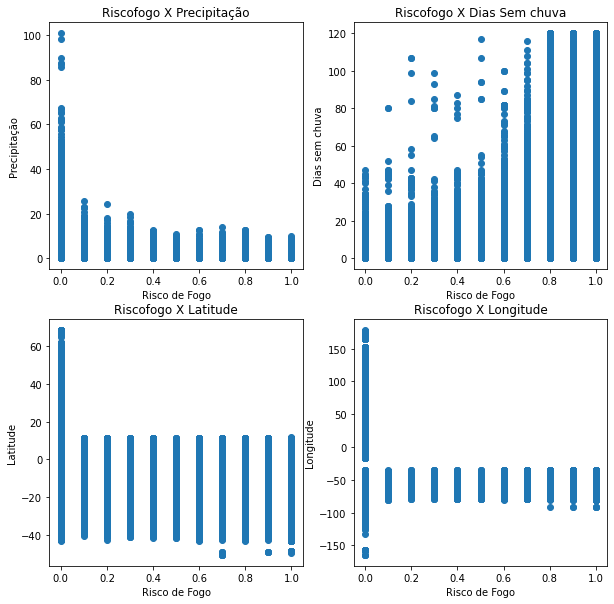

In [32]:
fig=plt.figure(figsize=(10,10))

#Riscofogo X Precipitação
plt.subplot(221)
plt.scatter(df_novo.riscofogo,df_novo.precipitacao)
plt.title("Riscofogo X Precipitação")
plt.ylabel("Precipitação")
plt.xlabel("Risco de Fogo")

#Riscofogo X Dias Sem chuva
plt.subplot(222)
plt.scatter(df_novo.riscofogo,df_novo.diasemchuva)
plt.title("Riscofogo X Dias Sem chuva")
plt.ylabel("Dias sem chuva")
plt.xlabel("Risco de Fogo")

#Riscofogo X Latitude
plt.subplot(223)
plt.scatter(df_novo.riscofogo,df_novo.latitude)
plt.title("Riscofogo X Latitude")
plt.ylabel("Latitude")
plt.xlabel("Risco de Fogo")

#Riscofogo X Longitude
plt.subplot(224)
plt.scatter(df_novo.riscofogo,df_novo.longitude)
plt.title("Riscofogo X Longitude")
plt.ylabel("Longitude")
plt.xlabel("Risco de Fogo")

plt.show()

Text(0.5, 1.0, 'Probplot:Longitude')

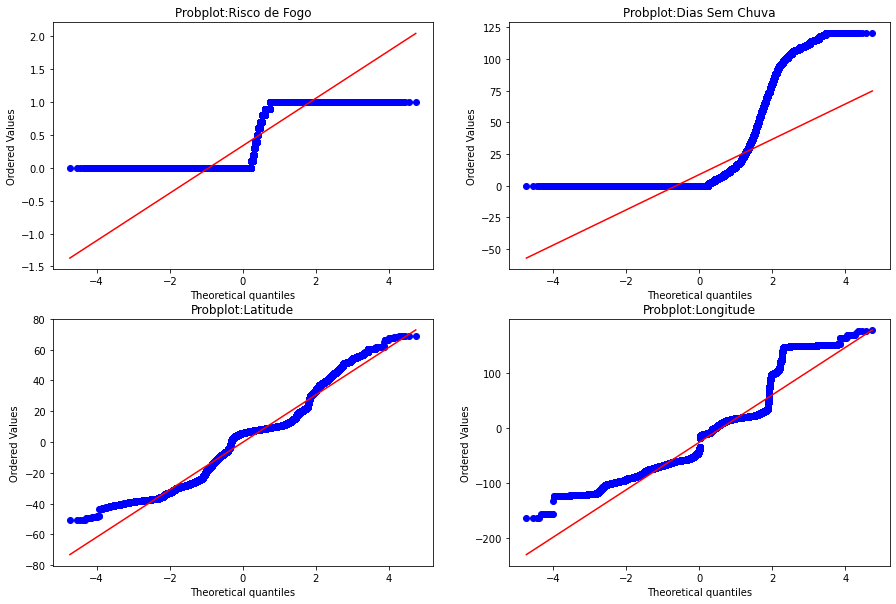

In [31]:
fig=plt.figure(figsize=(15,10))

plt.subplot(221)
stats.probplot(df_novo.riscofogo, plot = plt )
plt.title("Probplot:Risco de Fogo")

plt.subplot(222)
stats.probplot(df_novo.diasemchuva, plot = plt )
plt.title("Probplot:Dias Sem Chuva")

plt.subplot(223)
stats.probplot(df_novo.latitude, plot = plt )
plt.title("Probplot:Latitude")

plt.subplot(224)
stats.probplot(df_novo.longitude, plot = plt )
plt.title("Probplot:Longitude")

In [13]:
#Salvando base de dados como CSV
df_novo.to_csv('BaseDeDados.csv')

In [14]:
data=pd.read_csv('BaseDeDados.csv')

In [15]:
data=data[["diasemchuva","precipitacao","latitude","longitude","mes","horario","estacao","riscofogo"]]
dataset = data.values
ft, target = dataset[:, :-1], dataset[:, -1]
x_treino, x_teste, y_treino, y_teste = train_test_split(ft, target, test_size=0.2, random_state=1)

In [16]:
modelo=linear_model.LinearRegression()

In [17]:
modelo.fit(x_treino,y_treino)

LinearRegression()

In [18]:
print("Coeficientes :",modelo.coef_)
y_predict=modelo.predict(x_teste)
print("      r^2 : %.2f"%r2_score(y_teste,y_predict))

Coeficientes : [ 0.00714365 -0.02841945 -0.00979189 -0.00351931  0.01885803  0.00460081
  0.00238905]
      r^2 : 0.69


## Dataset para testar eficiencia 

In [20]:
dados_conf=pd.read_csv("Focos_2019-10-04_2020-10-04.csv", low_memory=False)

In [21]:
dados_conf[['data','hora']] = dados_conf.datahora.str.split(" ",expand=True,)

dados_def=dados_conf.drop(["datahora","satelite","bioma","municipio","estado","frp"], axis=1)

dados_def.data = dados_def.data.str.replace("/", " ")
dados_def[['ano','mes',"dia"]] = dados_def.data.str.split(" ",expand=True,)

dados_def['hora'] = dados_def['hora'].str.replace(r'\D', '')
dados_def['hora'] = dados_def['hora'].astype(int)
dados_def['mes'] = dados_def['mes'].astype(int)
dados_def['dia'] = dados_def['dia'].astype(float)

dados_def.loc[(60000< dados_def.hora) | (dados_def.hora<180000), "horario"]=0
dados_def.loc[(dados_def.hora>180000) | (dados_def.hora<60000), "horario"]=1


dados_def=dados_def.drop(["data","ano","hora"], axis=1)
dados_def.dropna(how='any', inplace=True)

In [22]:
indexNames2 =dados_def[ (dados_def['diasemchuva'] < 0) | (dados_def['riscofogo'] < 0) ].index
dados_def.drop(indexNames2 , inplace=True)

In [23]:
dados_def.loc[(dados_def.mes==3) & (dados_def.dia>=20), "estacao"]=1
dados_def.loc[(dados_def.mes==6) & (dados_def.dia>=21), "estacao"]=2
dados_def.loc[(dados_def.mes==9) & (dados_def.dia>=23), "estacao"]=3
dados_def.loc[(dados_def.mes==12) & (dados_def.dia>=22), "estacao"]=4
dados_def.loc[(dados_def.mes<=6) & (dados_def.mes>3) | (dados_def.mes==6)  & (dados_def.dia<21) , "estacao"]=1
dados_def.loc[(dados_def.mes<=9) & (dados_def.mes>6) | (dados_def.mes==9) & (dados_def.dia<23), "estacao"]=2
dados_def.loc[(dados_def.mes<=12) & (dados_def.mes>9) | (dados_def.mes==12) & (dados_def.dia<22), "estacao"]=3
dados_def.loc[(dados_def.mes<=3) & (dados_def.mes>=1) | (dados_def.mes==3) & (dados_def.dia<23) , "estacao"]=4

dados_def=dados_def[["pais","diasemchuva","precipitacao","latitude","longitude","mes","dia","horario","estacao","riscofogo"]]
dados_def.head()

,pais,diasemchuva,precipitacao,latitude,longitude,mes,dia,horario,estacao,riscofogo
0,Brasil,7.0,8.1,-16.916,-44.824,10,22.0,0.0,3.0,0.4
1,Brasil,9.0,7.7,-16.917,-44.834,10,22.0,0.0,3.0,0.5
2,Brasil,15.0,28.5,-18.018,-42.134,10,22.0,0.0,3.0,0.0
3,Brasil,8.0,28.8,-18.023,-41.505,10,22.0,0.0,3.0,0.0
4,Brasil,5.0,3.4,-18.151,-46.168,10,22.0,0.0,3.0,0.2


In [24]:
dados_def.to_csv('BaseDeDadosOficial.csv')

In [25]:
database=pd.read_csv('BaseDeDados.csv')
database=database[["diasemchuva","precipitacao","latitude","longitude","mes","horario","estacao","riscofogo"]]
#dataset_def = database.values
#dataset_def

In [26]:
Y=database.riscofogo
X=database.drop(["riscofogo"],axis=1)

In [27]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.2, random_state=1)

In [28]:
modelo=linear_model.LinearRegression()

In [29]:
modelo.fit(x_treino,y_treino)

LinearRegression()

In [30]:
print("Coeficientes :",modelo.coef_)
y_predict=modelo.predict(x_teste)
print("      r^2 : %.2f"%r2_score(y_teste,y_predict))

Coeficientes : [ 0.00714365 -0.02841945 -0.00979189 -0.00351931  0.01885803  0.00460081
  0.00238905]
      r^2 : 0.69
